In [100]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [101]:
#Nをセット
N = 8
loc = [0] * N
cnt = 0

In [102]:
def plot_chessboard(N, queens):
    """Create a chessboard with queens using matplotlib. Image is saved
    in the root directory. Returns the image file name.
    """
    chessboard = np.zeros((N,N))
    chessboard[1::2,0::2] = 1
    chessboard[0::2,1::2] = 1

    # Adjust fontsize for readability
    if N <= 10:
        fontsize = 30
    elif N <= 20:
        fontsize = 10
    else:
        fontsize = 5

    plt.xticks(np.arange(N))
    plt.yticks(np.arange(N))

    plt.imshow(chessboard, cmap='binary')

    # Place queens
    for x,y in enumerate(queens):

        if x != -1 and y != -1:
            plt.text(x, y, u"\u2655", fontsize=fontsize, ha='center',
                     va='center', color='black' if (x - y) % 2 == 0 else 'white')

    # Save file in root directory
    file_name = "{}-queens-solution.png".format(N)
    plt.savefig(file_name)

In [103]:
#ある列のある場所にQueenが置けるかどうかをチェック
def is_available(test_col, test_loc):
    global cnt
    cnt = cnt + 1
        
    for i in range(test_col):
        #左斜め上        
        if loc[test_col-i-1] == test_loc-i-1:
            return False
        #左方向
        if loc[test_col-i-1] == test_loc:
            return False
        #左斜め下
        if loc[test_col-i-1] == test_loc+i+1:
            return False
    
    #左方向に衝突がなければ、置けるのでTrueを返す
    return True



In [104]:
def test_next(test_col):
    global cnt
    cnt = cnt + 1
    if test_col == N:
        return True
    
    #もし、指定された列にQueenを置けるか上から順に試し、置けるのであれば仮置きして次の列をチェックする。
    #指定された列と次の列も置けるようであれば、成功（True）を返す
    
    for i in range(N):
        if is_available(test_col,i):
            #置けるようであればそこに仮置きして次の行にもどこか置ける部分があればTrueを返す。
            loc[test_col] = i
            if test_next(test_col+1):
                return True
    
    #指定された列のどこにもQueenを置けなければ失敗（False）を返す。
    return False

解あり
試した回数 21, 処理時間 0.0秒


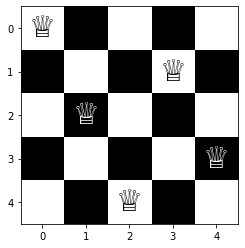

In [105]:
#メインロジック

start_time = time.time()
if test_next(0):
    print("解あり")
else:
    print("解なし")
end_time = time.time()
print(f"試した回数 {cnt}, 処理時間 {(end_time-start_time):.1f}秒")

plot_chessboard(N,loc)